# CS 412 Machine Learning 2020 

# Assignment 1

100 pts

## Goal 

The goal of this assignment 

*  Introduction to the machine learning experimental set up
*  Gain experience with the Scikit library
*  Gain experience with Decision tree and k-NN models

## Dataset

**Wine Quality Dataset** is a collection red and white wines with 12 attributes. The target variable is the 'quality' either 0 or 1


## Task
Build a decision tree and k-NN classifiers with the scikit-learn library function calls to **classify** the quality of wine as good (1) and bad (0)

## Submission

Follow the instructions at the end.

# 1) Initialize

First, make a copy of this notebook in your drive

In [1]:
# Mount to your drive, in this way you can reach files that are in your drive
# Run this cell

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2) Load Dataset
To start working for your homework, take a copy of the folder, given in the below link to your own google drive. You find the train and test data under this folder.

https://drive.google.com/drive/folders/1PC6M332CTdW-OOrgJ-1GU1F3UaRupka8?usp=sharing

After copy the folder, copy the path of the train and test dataset to paste them in the below cell to load your data.

In [2]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('/content/drive/My Drive/hw1_data/winequality-train.csv')
test_df = pd.read_csv("/content/drive/My Drive/hw1_data/winequality-test.csv")

# 3) Understand the dataset

You can use the fuctions that we saw in the recitations to understand the dataset

In [3]:
# print shape of the train and test sets

print("The train dataset has", train_df.shape[1], "columns and", train_df.shape[0], "rows.")
print("The test dataset has", test_df.shape[1], "columns and", test_df.shape[0], "rows.")


# show random samples from the training data

train_df.sample(n=5)

The train dataset has 13 columns and 5198 rows.
The test dataset has 13 columns and 1299 rows.


fixed acidity  volatile acidity  ...  wine type  quality
3701            7.0             0.350  ...          0        1
5059            6.9             0.430  ...          0        0
3481            6.4             0.280  ...          0        1
5026            4.9             0.335  ...          0        0
2776            8.2             0.440  ...          1        0

[5 rows x 13 columns]

In [4]:
# print information about the datasets (Is there any missing value? or Categorical feature?)

print(train_df.info(), "\n\n")
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5198 non-null   float64
 1   volatile acidity      5198 non-null   float64
 2   citric acid           5198 non-null   float64
 3   residual sugar        5198 non-null   float64
 4   chlorides             5198 non-null   float64
 5   free sulfur dioxide   5198 non-null   float64
 6   total sulfur dioxide  5198 non-null   float64
 7   density               5198 non-null   float64
 8   pH                    5198 non-null   float64
 9   sulphates             5198 non-null   float64
 10  alcohol               5198 non-null   float64
 11  wine type             5198 non-null   int64  
 12  quality               5198 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 528.0 KB
None 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 t

# 4) Define train and test labels

In [5]:
# make sure you remove the labels from datasets

train_labels = train_df.drop("quality", axis=1)
test_labels = test_df.drop("quality", axis=1)

# 5) FineTune Decision Tree hyper-parameters

1-Splitting dataset into train and validation

In [6]:
# Split training data to 70% training and 30% validation, do not forget to use the random_state parameter
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_labels, train_df["quality"], random_state = 42, test_size = 0.30)

2- FineTune minimum sample split

In [7]:
from sklearn.tree import DecisionTreeClassifier

min_samples_splits = range(2, 50)

train_results = []
val_results = []
for min_samples_split in min_samples_splits:

  # Fit the tree using the 70% portion of the training data
  tree_model = DecisionTreeClassifier(min_samples_split = min_samples_split)
  tree_model.fit(x_train, y_train)
  
  # Evaluate on Training set
  train_acc = tree_model.score(x_train, y_train)
  train_results.append(train_acc)
   
  # Evaluate on Validation set
  val_acc = tree_model.score(x_val, y_val)
  val_results.append(val_acc)

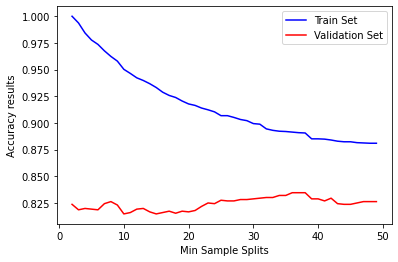

In [8]:
# Plot the results
import matplotlib.pyplot as plt

plt.plot(min_samples_splits, train_results, 'b', label = "Train Set")
plt.plot(min_samples_splits, val_results,'r', label = "Validation Set")
plt.legend()
plt.xlabel("Min Sample Splits")
plt.ylabel("Accuracy results")
plt.show()

In [18]:
# Choose the best minimum split sample based on the plot
Best_minSampl = val_results.index(max(val_results)) + 2  #because the range starts from 2

# Train decision tree using the full training data and the best minimum split sample
tree_model = DecisionTreeClassifier(min_samples_split = Best_minSampl)
tree_model.fit(train_labels, train_df["quality"])

# Estimate the prediction of the test data
test_pred = tree_model.predict(test_labels)

from sklearn.metrics import accuracy_score
# Calculate accuracy of test data
TestAcc = accuracy_score(test_df["quality"], test_pred)
print("Testing Accuracy = %.4f%%" % (TestAcc * 100))

Testing Accuracy = 81.9861%


# 6) Apply the same procedure but using k-NN instead of decision tree

For finetuning, find the best value of K to use with this dataset.

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# initialize the values of k to be a list of odd numbers between 1 and 30
kVals = np.arange(1, 30, 2)

# Save the accuracies of each value of kVal in [accuracies] variable
# hint: you can use accuracies.append(...) function inside the loop
accuracies = []

# loop over values of k for the k-Nearest Neighbor classifier
for k in kVals:
  knn_model = KNeighborsClassifier(n_neighbors = k)
  knn_model.fit(x_train, y_train)
  
  val_acc = knn_model.score(x_val, y_val)
  accuracies.append(val_acc)

print("Best Validation Accuracy = %.4f%%" % (np.max(accuracies)*100))

Best Validation Accuracy = 80.9615%


In [21]:
# Train k-NN using the full training data with the best K that you found
knn_model = KNeighborsClassifier(n_neighbors = 2 * accuracies.index(max(accuracies))+1)  #because k values are odd
knn_model.fit(train_labels, train_df["quality"])

# Testing
test_acc = knn_model.score(test_labels, test_df["quality"])
print("Test Accuracy = ", format(test_acc * 100, ".4f"), "%", sep = "")

Test Accuracy = 81.2163%


# 7) Notebook & Report

Notebook: We may just look at your notebook results; so make sure each cell is run and outputs are there.

Report: Write an at most 1/2 page summary of your approach to this problem at the end of your notebook; this should be like an abstract of a paper or the executive summary.

Must include statements such as:

( Include the problem definition: 1-2 lines )

(Talk about any preprocessing you did, explain your reasoning)

(Talk about train/val/test sets, size and how split)

(State what your test results are with the chosen method, parameters: e.g. "We have obtained the best results with the ….. classifier (parameters=....) , giving classification accuracy of …% on test data….")

(Comment on the speed of the algorithms and anything else that you deem important/interesting)


You will get full points from here as long as you have a good (enough) summary of your work, regardless of your best performance or what you have decided to talk about in the last few lines.



**REPORT**

The goal of these machine learning models is to predict the wine quality according to the labels such as acidity, density, pH features given in the Wine Quality Dataset. 

The dataset has no categorical value, all the labels have either integer or float values as type and they do not include any missing values. Therefore preprocessing is not needed.

The train dataset has 13 columns and 5198 rows and the test dataset has 13 columns and 1299 rows. Train dataset has been splitted to two as train and validation as %70 and %30, respectively.

I have obtained 81.9861% test accuracy using Decision Tree Classifier with the best minimum sample split parameter as 36 based on the validation accuracies. On the other hand, I have obtained 81.2163% test accuracy using K-nn Classifier taking the n-neighbors parameter as 19 based on the validation data accuracies. Therefore, the chosen method is Decision Tree Classifier. 

Whereas the last cell of the Decision Tree Classifier part took 0.637 seconds, the last cell of K-nn method took 0.633 seconds which seems to me as a neglectable difference. Another interesting thing to me is that the test accuracy is almost 2% lower than the best validation score in Decision Tree Classifier.

# 8) Submission
You will submit this homework via SUCourse.


Please read this document again before submitting it.

Please submit your **"share link" INLINE in Sucourse submissions.** That is we should be able to click on the link and go there and run (and possibly also modify) your code.

For us to be able to modify, in case of errors etc, you should get your "share link" as **share with anyone in edit mode** 

Download the **.ipynb and the .html** file and upload both of them to Sucourse.
 
Please do your assignment individually, do not copy from a friend or the Internet. Plagiarized assignments will receive -100.
